# Using the random pose engine

The random pose engine will use input policies linked to a list of models to randomly place objects within a defined workspace.


In [1]:
import os
import numpy as np

from pcg_gazebo.generators import WorldGenerator
from pcg_gazebo.visualization import plot_workspace

world_gen = WorldGenerator()

line 93.
line 104.
line 105.
line 109.
line 111.
line 109.
line 111.
line 106.
line 107.
line 109.
line 111.
line 109.
line 111.
line 108.
line 94.
line 101.
line 102.
line 104.
line 107.
line 109.
line 111.
line 109.
line 111.
line 108.
line 103.
line 95.
line 96.
line 88.
line 89.
default
line 90.
line 91.
line 92.


In [2]:
world_gen.add_asset(
    tag='box',
    description=dict(
        type='box',
        args=dict(
            size="5 * __import__('pcg_gazebo').random.rand(3)",
            name='cuboid',
            color='xkcd'
        )
    )
)

line 111.


True

In [3]:
try:
    mesh_filename = os.path.join(
        os.path.dirname(os.path.abspath(__file__)),
        '..',
        'examples',
        'meshes',
        'monkey.stl')
except:    
    mesh_filename = os.path.abspath('../examples/meshes/monkey.stl')
print('Mesh filename = ', mesh_filename, os.path.exists(mesh_filename))
world_gen.add_asset(
    tag='monkey',
    description=dict(
        type='mesh',
        args=dict(
            visual_mesh=mesh_filename,
            name='monkey',
            color='xkcd'
        )
    )
)

Mesh filename =  /data/pcg_gazebo-master/examples/meshes/monkey.stl True
line 111.


True

In [4]:
world_gen.add_constraint(
    name='tangent_to_ground_plane',
    type='tangent',
    frame='world',
    reference=dict(
        type='plane',
        args=dict(
            origin=[0, 0, 0],
            normal=[0, 0, 1]
        )
    )
)

True

List of constraints= ['ws', 'tangent_to_ground_plane']


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5bbc31c668>)

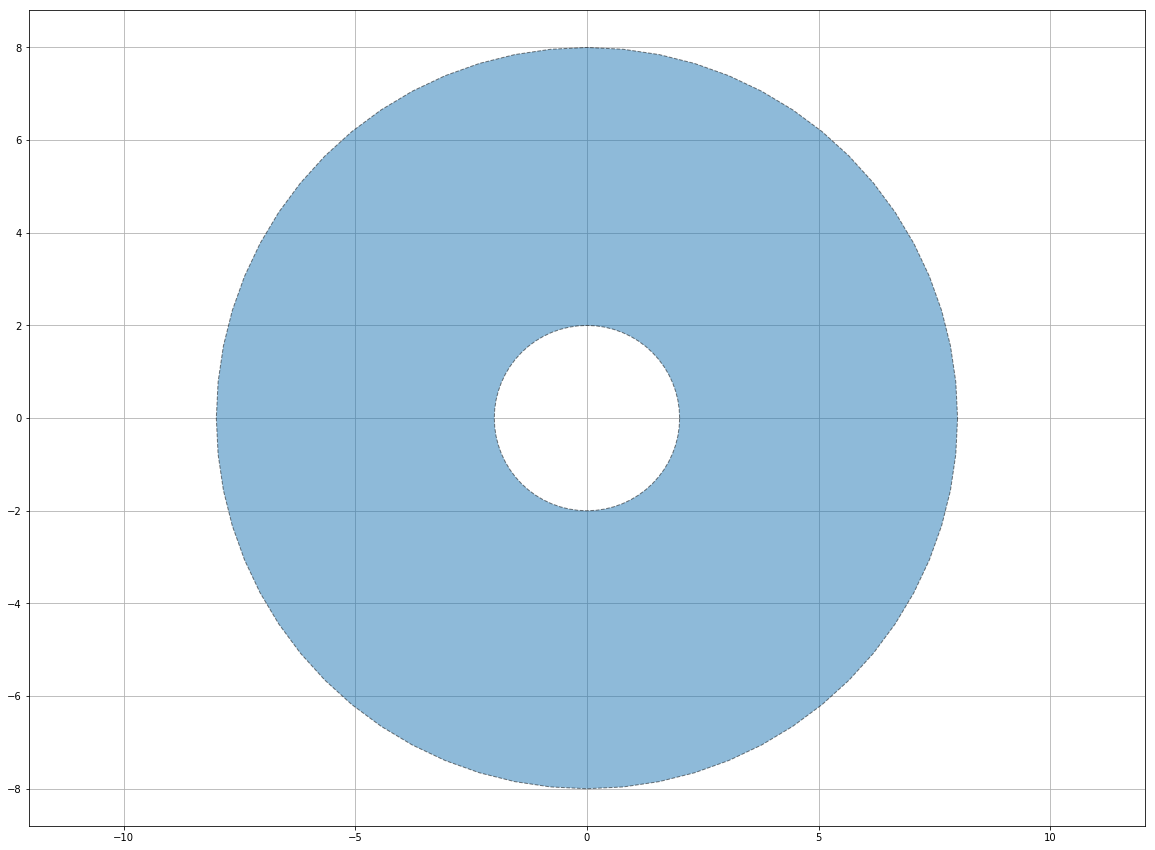

In [5]:
world_gen.add_constraint(
    name='ws',
    type='workspace',
    frame='world',
    geometry_type='circle',        
    center=[0, 0, 0],
    radius=8,
    holes=[
        dict(
            type='circle',
            center=[0, 0, 0],
            radius=2
        )
    ]
)

print('List of constraints=', list(world_gen.constraints.tags))

plot_workspace(workspace=world_gen.constraints.get('ws'))

In [6]:
NUM_BOXES = 10
NUM_MONKEYS = 4

placement_policy = dict(
    models=['box', 'monkey'],
    config=[
        dict(
            dofs=['x', 'y'],            
            tag='workspace',
            workspace='ws'
        ),
        dict(
            dofs=['roll', 'pitch', 'yaw'],            
            tag='uniform',                            
            min=-3.141592653589793,
            max=3.141592653589793               
        )
    ]
)

world_gen.add_engine(
    tag='random_engine',
    engine_name='random_pose',
    models=['box', 'monkey'],
    max_num=dict(
        box=NUM_BOXES,
        monkey=NUM_MONKEYS),
    model_picker='random',
    no_collision=True,
    policies=[placement_policy],
    constraints=[
        dict(
            model='box',
            constraint='tangent_to_ground_plane'),
        dict(
            model='monkey',
            constraint='tangent_to_ground_plane')
    ]
)

True

In [7]:
world_gen.run_engines()

line 1.
line 2.
line 3.
line 4.
line 5.
line 6.
line 7.
random_engine
line 8.
<class 'pcg_gazebo.generators.engines.random_pose_engine.RandomPoseEngine'>
line 9.
line 14.
line 15.
line 16.
line 17.
line 54.
line 19.
line 37.
line 38.
line 39.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 40.
line 49.
line 37.
line 38.
line 39.
line 81.
line 82.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 40.
line 49.
line 37.
line 38.
line 39.
line 81.
line 82.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 40.
line 49.
line 37.
line 38.
line 39.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 40.
line 49.
line 37.
line 38.
line 39.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 40.
lin

True

In [ ]:
print(world_gen.world.models.keys())

line 54.
line 55.
default
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 111.
line 68.
line 69.
line 70.
line 71.
line 72.
line 73.
line 74.
line 66.
line 67.
line 85.
line 86.
line 65.
line 81.
line 82.
line 111.
line 111.
line 111.
line 111.


In [9]:
world_gen.world.show()

SceneViewer(width=1869, height=1025)

The worlds are randomly generated each time the engine is run. One example of the output delivered as a result can be seen below.

![gen_random_poses](images/gen_random_pose_gen.png)